# Libraries and Data

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('DailyDelhiClimateTest.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


# Time Series Index

In [3]:
# Convert 'Date' To a Datetime and set as index
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df.set_index('date', inplace=True)
df.head()


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [7]:
# Select the Bitcoin Data for 9 November 2021
df.loc['2017-01-01']

,2017-01-01
meantemp,15.913043
humidity,85.869565
wind_speed,2.743478
meanpressure,59.000000


In [8]:
# Resampling to Weekly Frequency and calculate the mean values
weekly_df = df.resample('W').mean()
print(weekly_df.head())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-08  17.487247  80.397627    5.061371   1015.048882
2017-01-15  13.191727  73.335438    6.806319   1017.212474
2017-01-22  14.732486  75.707698    9.368017   1020.516354
2017-01-29  17.239193  78.189352    8.815970   1018.575580


# Exploring Data

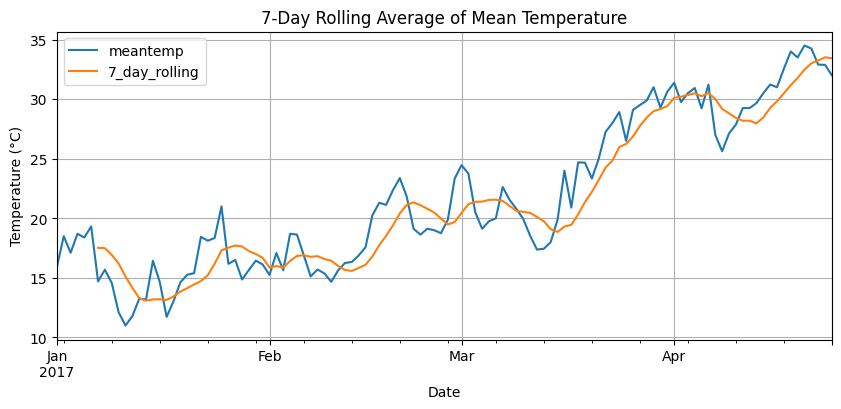

In [9]:
import matplotlib.pyplot as plt

# Create a 7-day rolling average for the mean temperature
df['7_day_rolling'] = df['meantemp'].rolling(window=7).mean()

# Plot both the daily mean temperature and the rolling average
df[['meantemp', '7_day_rolling']].plot(figsize=(10, 4))
plt.title('7-Day Rolling Average of Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [12]:
most_humid_month = df.resample('ME').mean()['humidity'].idxmax()
print(f"The month with the highest average humidity is {most_humid_month}.")

The month with the highest average humidity is 2017-01-31 00:00:00.


In [13]:
df

,meantemp,humidity,wind_speed,meanpressure,7_day_rolling
date,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,NaN
2017-01-02,18.500000,77.222222,2.894444,1018.277778,NaN
2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN
2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN
2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN
...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,32.468254
2017-04-21,34.250000,39.375000,6.962500,999.875000,33.003968
2017-04-22,32.900000,40.900000,8.890000,1001.600000,33.243651


In [14]:
df.resample('ME').mean()

,meantemp,humidity,wind_speed,meanpressure,7_day_rolling
date,,,,,
2017-01-31,15.710873,77.188256,7.162982,986.767947,15.458470
2017-02-28,18.349981,64.375728,7.566294,1015.574251,17.876299
2017-03-31,23.753760,48.009694,8.884385,1010.469641,22.815072
2017-04-30,30.753663,30.408185,9.128446,1004.564831,30.388903


In [15]:
df['temp_change_pct'] = df['meantemp'].pct_change() * 100
df.head()


,meantemp,humidity,wind_speed,meanpressure,7_day_rolling,temp_change_pct
date,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,NaN,NaN
2017-01-02,18.500000,77.222222,2.894444,1018.277778,NaN,16.256831
2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN,-7.507508
2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN,9.285714
2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN,-1.663696


In [16]:
# Days with more than 10% change in closing price
df[abs(df['temp_change_pct']) > 10].head()

,meantemp,humidity,wind_speed,meanpressure,7_day_rolling,temp_change_pct
date,,,,,,
2017-01-02,18.500000,77.222222,2.894444,1018.277778,NaN,16.256831
2017-01-07,14.708333,95.833333,10.041667,1011.375000,17.519937,-23.862745
2017-01-10,12.111111,71.944444,9.361111,1016.888889,16.211736,-16.884532
2017-01-13,13.235294,67.058824,6.435294,1017.529412,13.299979,12.263655
2017-01-15,16.434783,72.565217,3.630435,1018.130435,13.191727,24.505929


# Data Visualization

In [17]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,7_day_rolling,temp_change_pct
date,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,NaN,NaN
2017-01-02,18.500000,77.222222,2.894444,1018.277778,NaN,16.256831
2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN,-7.507508
2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN,9.285714
2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN,-1.663696


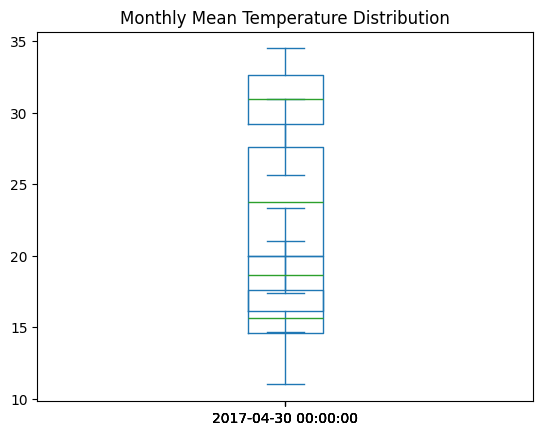

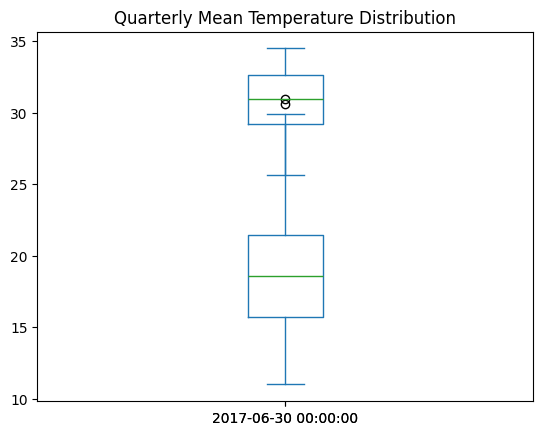

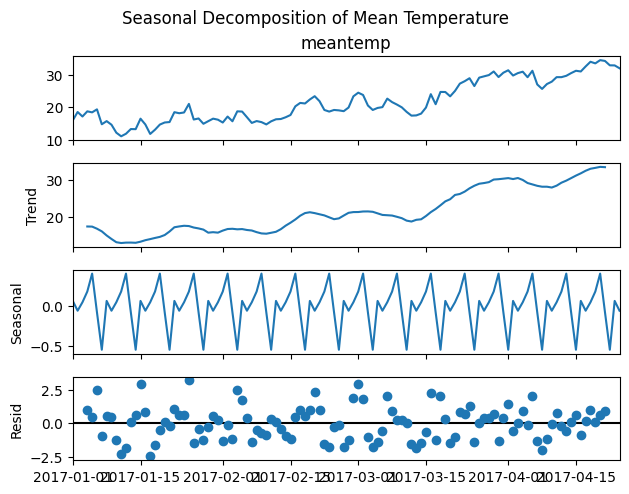

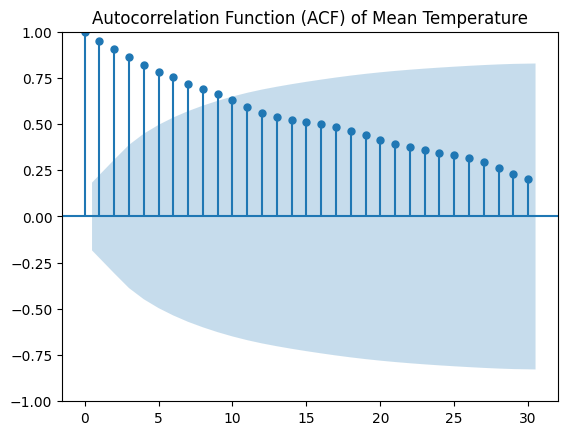

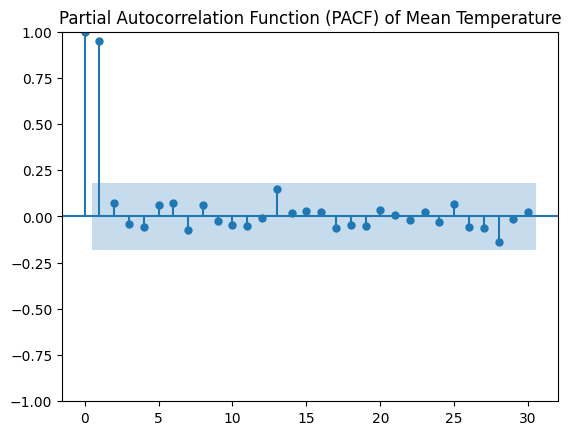

In [19]:
# Monthly Boxplot for Mean Temperature
df.resample('ME')['meantemp'].plot(kind='box', title='Monthly Mean Temperature Distribution')
plt.show()

# Quarterly Boxplot for Mean Temperature
df.resample('QE')['meantemp'].plot(kind='box', title='Quarterly Mean Temperature Distribution')
plt.show()

# Seasonal Decomposition of Mean Temperature
decomposition = seasonal_decompose(df['meantemp'], model='additive', period=7)
fig = decomposition.plot()
fig.suptitle('Seasonal Decomposition of Mean Temperature', y=1.02)
plt.show()

# Autocorrelation Function (ACF) plot
plot_acf(df['meantemp'], lags=30)
plt.title('Autocorrelation Function (ACF) of Mean Temperature')
plt.show()

# Partial Autocorrelation Function (PACF) plot
plot_pacf(df['meantemp'], lags=30)
plt.title('Partial Autocorrelation Function (PACF) of Mean Temperature')
plt.show()

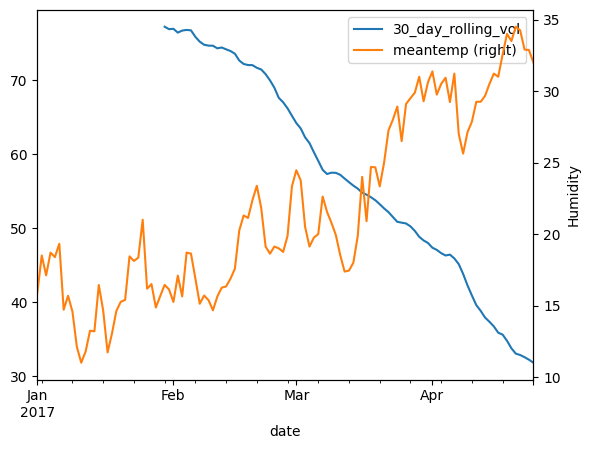

In [20]:
# Create a new column for 30- Day rolling average of the volume
df['30_day_rolling_vol'] = df['humidity'].rolling(window = 30).mean()

# Plotting Closing Price and 30-day rolling Volume
df['30_day_rolling_vol'].plot(legend = True)
ax = df['meantemp'].plot(secondary_y = True, legend = True)
ax.set_ylabel('Humidity')
plt.show()

In [21]:
# High correlation between the 30-day rolling humidity and the mean temperature
df[['meantemp', '30_day_rolling_vol']].corr()

,meantemp,30_day_rolling_vol
meantemp,1.00000,-0.90205
30_day_rolling_vol,-0.90205,1.00000


there is a strong inverse relationship between the average mean temperature and the 30-day rolling average of humidity

# Data Manipulation

In [22]:
# Identify missing values
df.isnull().sum()

,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0
7_day_rolling,6
temp_change_pct,1
30_day_rolling_vol,29


In [23]:
df = df.fillna(df.mean())
df.isnull().sum()

,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0
7_day_rolling,0
temp_change_pct,0
30_day_rolling_vol,0


In [24]:
# Extract Time Variables
df['year'] = df.index.year# Extracts the year
df['month'] = df.index.month# Extracts the month number
df['day'] = df.index.day # Extracts the day of the month
df['weekday'] = df.index.day_name()# Extracts the name of the day
df['weekday_numeric'] = df.index.weekday# Extracts the day as a number

# Create a new boolean column that tells if the day is a weekend (Saturday or Sunday)
# 5 & 6 is for Saturday and Sunday
df['is_weekend'] = df.index.weekday > 4 #true if Saturday (5) or Sunday (6), else False

df.head()

,meantemp,humidity,wind_speed,meanpressure,7_day_rolling,temp_change_pct,30_day_rolling_vol,year,month,day,weekday,weekday_numeric,is_weekend
date,,,,,,,,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,21.514806,1.004024,56.980484,2017,1,1,Sunday,6,True
2017-01-02,18.500000,77.222222,2.894444,1018.277778,21.514806,16.256831,56.980484,2017,1,2,Monday,0,False
2017-01-03,17.111111,81.888889,4.016667,1018.333333,21.514806,-7.507508,56.980484,2017,1,3,Tuesday,1,False
2017-01-04,18.700000,70.050000,4.545000,1015.700000,21.514806,9.285714,56.980484,2017,1,4,Wednesday,2,False
2017-01-05,18.388889,74.944444,3.300000,1014.333333,21.514806,-1.663696,56.980484,2017,1,5,Thursday,3,False


In [25]:
# Create 2 new columns for lagged values 1 and 2
df['humidity_lag1'] = df['humidity'].shift(1)
df['wind_speed_lag1'] = df['wind_speed'].shift(1)


<Axes: xlabel='date'>

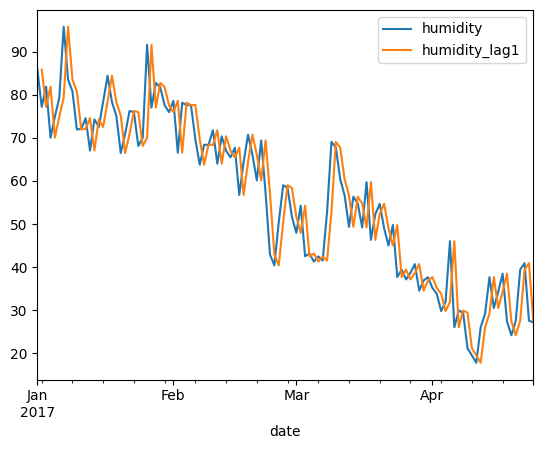

In [26]:
df[['humidity', 'humidity_lag1']].plot()


that daily humidity levels remain relatively stable without drastic fluctuations. The general downward trend indicates a decrease in humidity over time from January to April 2017.

In [27]:
df.resample('M')['humidity'].mean()

<ipython-input-27-a129034fcba3>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['humidity'].mean()


,humidity
date,
2017-01-31,77.188256
2017-02-28,64.375728
2017-03-31,48.009694
2017-04-30,30.408185


# Seasonality

<ipython-input-29-af92a4a7f8c5>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['humidity'].mean().plot(ylabel='humidity')


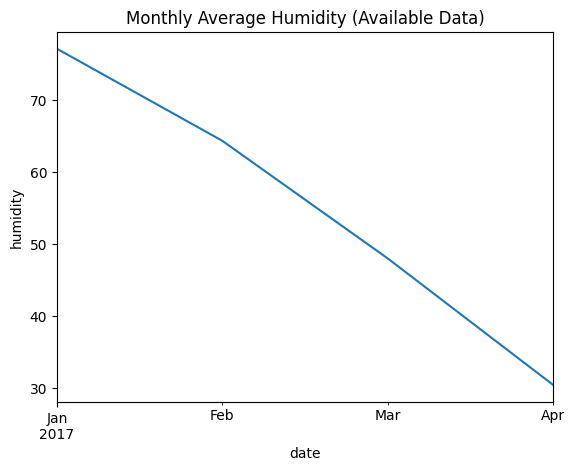

In [29]:
# Plotting the monthly average humidity for the available months
df.resample('M')['humidity'].mean().plot(ylabel='humidity')
plt.title('Monthly Average Humidity (Available Data)')
plt.show()

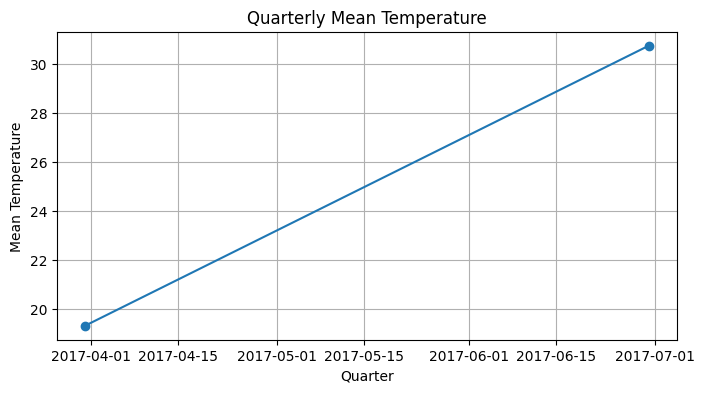

In [31]:
import matplotlib.pyplot as plt

quarterly = df['meantemp'].resample('QE').mean()

plt.figure(figsize=(8, 4))
plt.plot(quarterly.index, quarterly.values, marker='o')
plt.title('Quarterly Mean Temperature')
plt.ylabel('Mean Temperature')
plt.xlabel('Quarter')
plt.grid(True)
plt.show()



In [33]:
import matplotlib.pyplot as plt

def month_plot(series, ylabel='Value'):

    monthly_data = series.resample('M').mean()
    months = monthly_data.index.month_name()
    monthly_means = monthly_data.groupby(months).mean()

    # To keep months in calendar order, create ordered categories
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    monthly_means = monthly_means.reindex(month_order)

    # Plot
    plt.figure(figsize=(10,5))
    monthly_means.plot(kind='bar', color='coral')
    plt.title('Monthly Seasonality')
    plt.ylabel(ylabel)
    plt.xlabel('Month')
    plt.grid(axis='y')
    plt.show()


<ipython-input-33-efc98a6fbb4f>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = series.resample('M').mean()


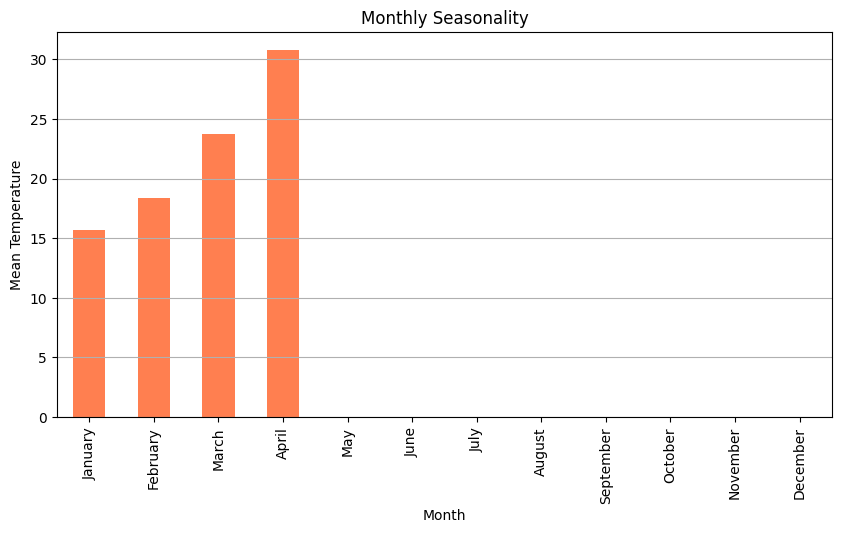

In [37]:
month_plot(df['meantemp'], ylabel='Mean Temperature')

Seasonality:
* 24 for hourly
* 7 or 365 for daily, but 7 is preferred for modeling
* 52 for weekly
* 12 for monthly
* 4 for quarterly
* 5 for weekdays

# Auto-Correlation

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.




In [38]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,7_day_rolling,temp_change_pct,30_day_rolling_vol,year,month,day,weekday,weekday_numeric,is_weekend,humidity_lag1,wind_speed_lag1
date,,,,,,,,,,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,21.514806,1.004024,56.980484,2017,1,1,Sunday,6,True,NaN,NaN
2017-01-02,18.500000,77.222222,2.894444,1018.277778,21.514806,16.256831,56.980484,2017,1,2,Monday,0,False,85.869565,2.743478
2017-01-03,17.111111,81.888889,4.016667,1018.333333,21.514806,-7.507508,56.980484,2017,1,3,Tuesday,1,False,77.222222,2.894444
2017-01-04,18.700000,70.050000,4.545000,1015.700000,21.514806,9.285714,56.980484,2017,1,4,Wednesday,2,False,81.888889,4.016667
2017-01-05,18.388889,74.944444,3.300000,1014.333333,21.514806,-1.663696,56.980484,2017,1,5,Thursday,3,False,70.050000,4.545000


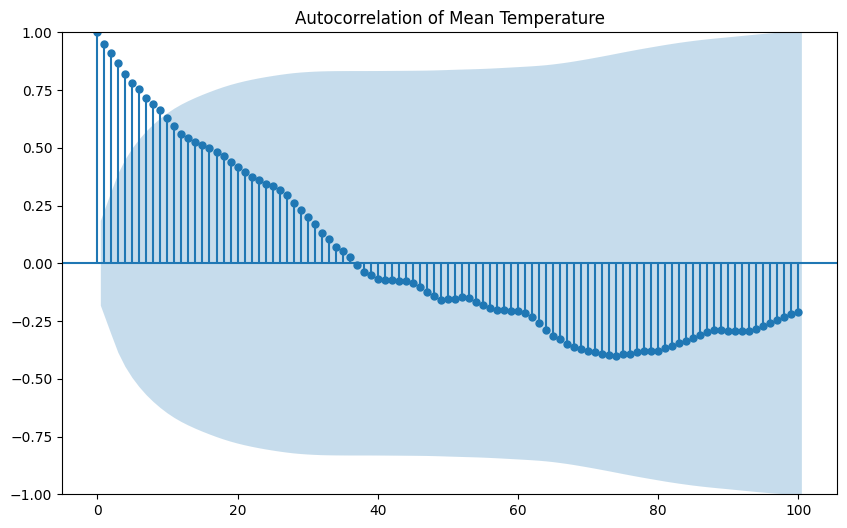

In [39]:
# Plot the autocorrelation (ACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(df['meantemp'], lags=100, ax=ax)
plt.title('Autocorrelation of Mean Temperature')
plt.show()


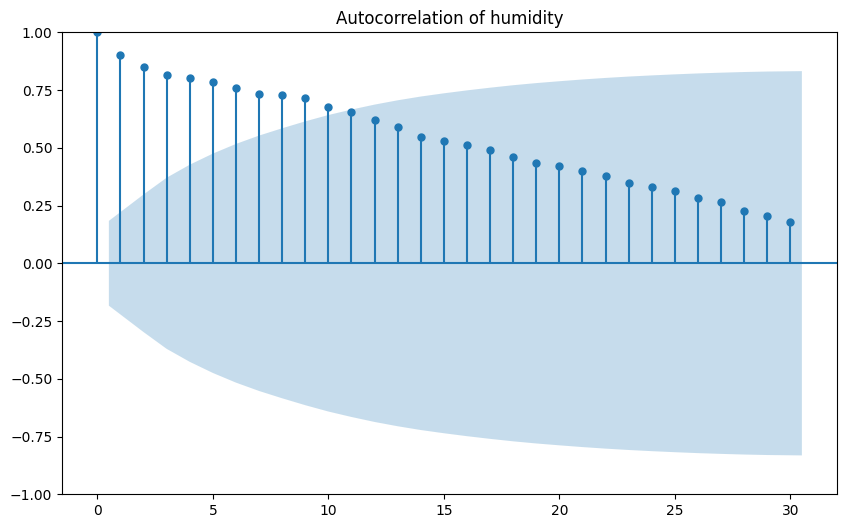

In [41]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(10,6))
plot_acf(df['humidity'], lags=30, ax=ax)
plt.title('Autocorrelation of humidity')
plt.show()


# Partial Auto-correlation

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

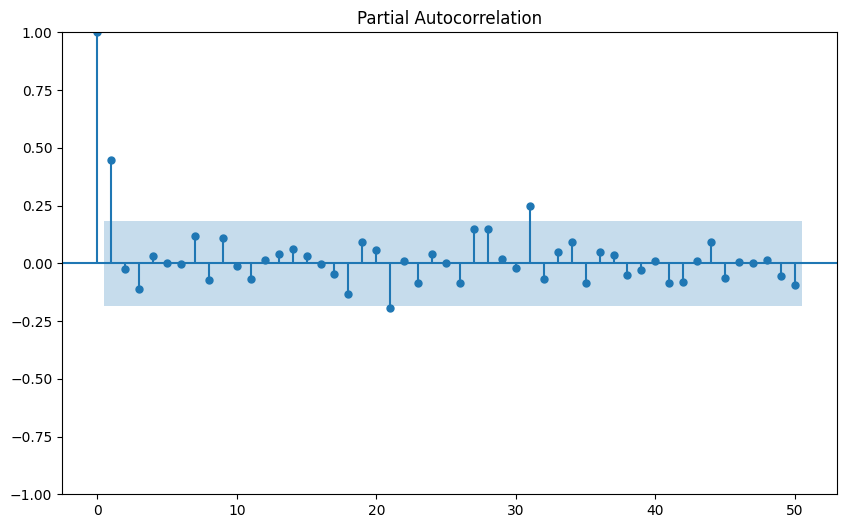

In [43]:
# Plot the partial autocorrelation (PACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['wind_speed'], lags = 50, ax = ax)
plt.show()

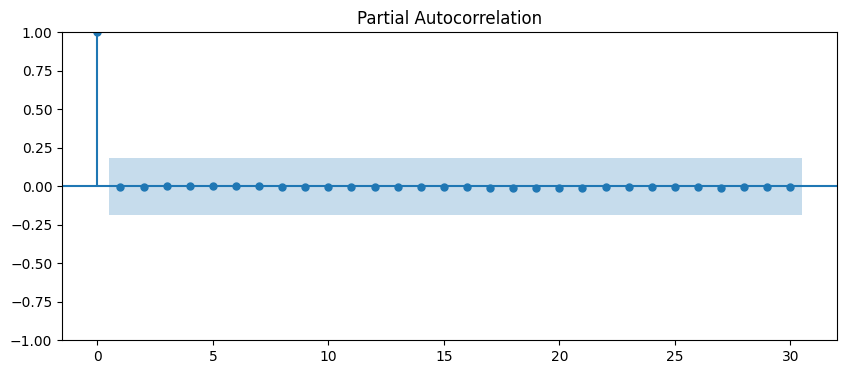

In [44]:
# Plot the partial autocorrelation (PACF) of the chocolate revenue values
fig, ax = plt.subplots(figsize = (10,4))
plot_pacf(df['meanpressure'], lags = 30, ax = ax)
plt.show()